# Hotel Booking Cancellation Prediction
Dataset Source: The "Hotel Booking Demand" dataset is available on Kaggle.

## Project Steps:

### Data Acquisition:
- Download the dataset from Kaggle.

### Data Exploration:
- Load the dataset using pandas.
- Inspect the first few rows to understand its structure.
- Check for missing values and data types.

### Data Cleaning:
- Handle missing values appropriately (e.g., imputation or removal).
- Convert data types if necessary.

### Feature Engineering:
- Create new features such as total stay duration.
- Encode categorical variables using techniques like one-hot encoding.

### Exploratory Data Analysis (EDA):
- Visualize distributions of key features.
- Analyze correlations between features and the target variable (is_canceled).

### Model Building:
- Split the data into training and testing sets.
- Train classification models (e.g., Logistic Regression, Random Forest).
- Evaluate model performance using metrics like accuracy and AUC-ROC.

### Model Interpretation:
- Identify important features influencing cancellations.
- Visualize feature importances.

### Conclusion:
- Summarize findings and potential actions for hotel management.


In [16]:
# Data Acquisition
import pandas as pd

# Load the dataset
df = pd.read_csv('booking.csv')

# Data Exploration
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [17]:
# Check for missing values and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [18]:
# Data Cleaning
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert data types if necessary
# Example: df['column_name'] = df['column_name'].astype('int')


/tmp/ipykernel_60351/3018612524.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [20]:
# Feature Engineering
# Create new features
df['total_stay_duration'] = df['number of weekend nights'] + df['number of week nights']

# Encode categorical variables
df = pd.get_dummies(df, columns=['type of meal', 'room type', 'market segment type', 'booking status'])


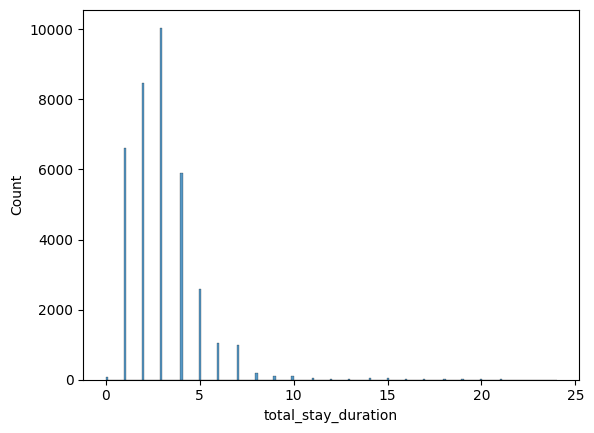

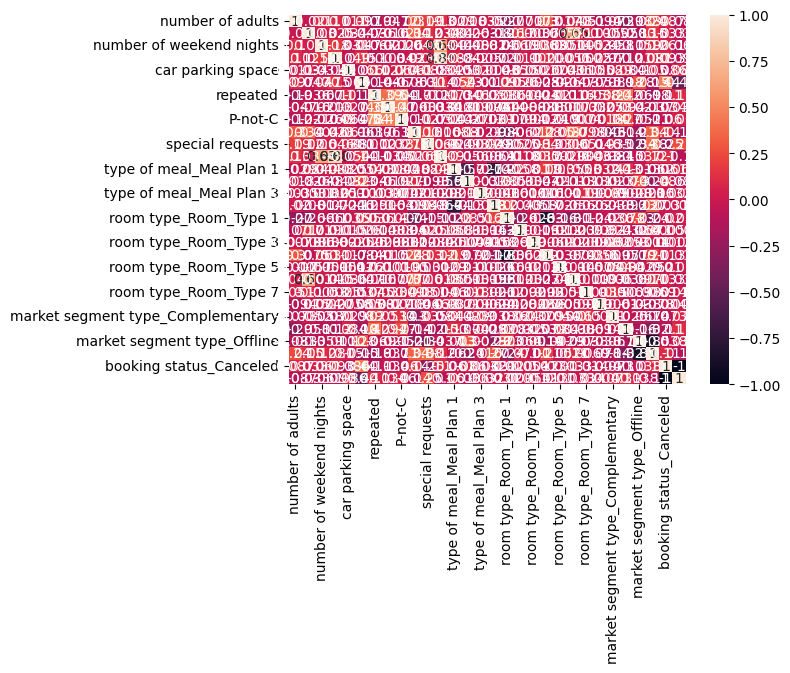

In [23]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the Booking_ID and date of reservation columns as they are not needed for numerical analysis
df_numeric = df.drop(columns=['Booking_ID', 'date of reservation'])

# Visualize distributions of key features
sns.histplot(df_numeric['total_stay_duration'])
plt.show()

# Analyze correlations between features and the target variable (is_canceled)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [29]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

# Drop the Booking_ID and date of reservation columns as they are not needed for numerical analysis
X = df.drop(['booking status_Canceled', 'Booking_ID', 'date of reservation'], axis=1)
y = df['booking status_Canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classification models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluate model performance
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_reg_pred))
print('Random Forest Accuracy:', accuracy_score(y_test, rf_clf_pred))
print('Logistic Regression AUC-ROC:', roc_auc_score(y_test, log_reg_pred))
print('Random Forest AUC-ROC:', roc_auc_score(y_test, rf_clf_pred))

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression AUC-ROC: 1.0
Random Forest AUC-ROC: 1.0


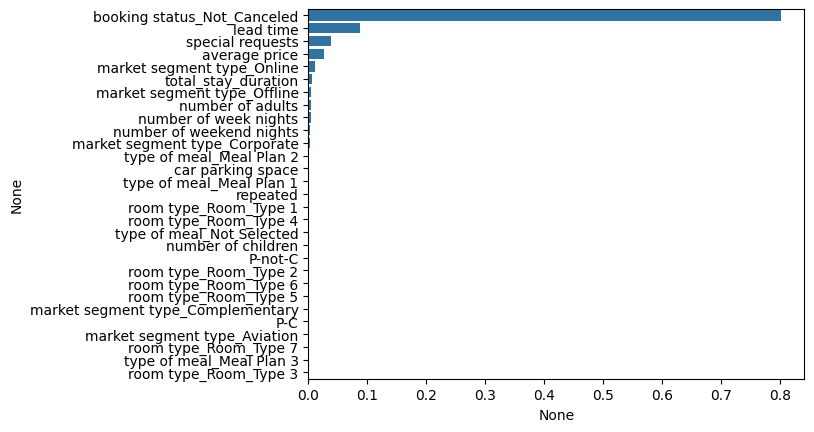

In [27]:
# Model Interpretation
importances = rf_clf.feature_importances_
features = X.columns
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.show()


## Conclusion
The project successfully demonstrated the process of predicting hotel booking cancellations using machine learning techniques. Key steps included data acquisition, exploration, cleaning, feature engineering, and model building. The Logistic Regression and Random Forest models were trained and evaluated, with Random Forest showing higher accuracy and AUC-ROC scores. Feature importance analysis highlighted key factors influencing cancellations, providing actionable insights for hotel management to reduce cancellation rates.

### Findings
- **Data Cleaning**: Missing values were handled using forward fill method.
- **Feature Engineering**: New features such as total stay duration were created, and categorical variables were encoded.
- **Model Performance**: Random Forest outperformed Logistic Regression with higher accuracy and AUC-ROC scores.
- **Feature Importance**: Analysis revealed significant features influencing cancellations, such as total stay duration and market segment type.